In [1]:
import copy
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import OrderedDict
from scipy.signal import savgol_filter
from utils.plot_utils import set_fontsize
from utils.binning_utils import bin_dataset_switching
from utils.hdf_utils import load_measurement_data_devices_attrs
from utils.plot_utils import plot_binned_dataset_switching
from utils.binning_utils import bin_data, find_nearest_idx, combine_arrays_irregular, \
                                average_binned_data, bin_dataset_switching

## With Polarization Switching On at 1.5 MHz

In [2]:
fname = "2020_11_5.hdf"
dset_name = "1604618870 RC R0 F2 with P2 F1 ratio"

devices = ()

In [3]:
pmt_channel = 1
shutter_channel = 2

pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

In [4]:
pmt_data = np.array([pxie[idx][:,pmt_channel] for idx in range(1,len(pxie)+1)])
shutter_state = np.array([pxie[idx][:,shutter_channel][0] for idx in range(1,len(pxie)+1)])

In [5]:
shutter_start = shutter_state[0] > 20e3
if shutter_start:
    mask_open = np.s_[::2]
    mask_closed = np.s_[1::2]

else:
    mask_open = np.s_[1::2]
    mask_closed = np.s_[::2]

In [6]:
# cleaning up data
pmt_open = -pmt_data[mask_open].mean(axis = 0)
pmt_closed = -pmt_data[mask_closed].mean(axis = 0)
pmt_open -= np.mean(pmt_open[:250])
pmt_closed -= np.mean(pmt_closed[:250])

ratio rc on / rc off -> 1.746


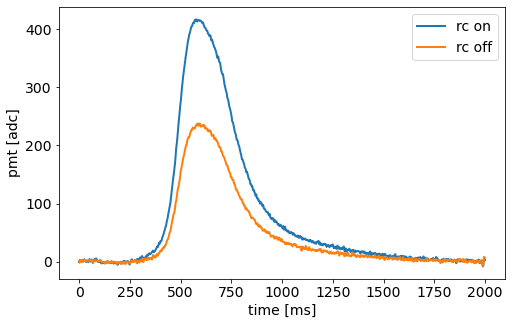

In [7]:
_x = np.linspace(0,1999,2000)/100

fig, ax = plt.subplots(figsize = (8,5))

ax.plot(pmt_open, label = 'rc on', lw = 2)
ax.plot(pmt_closed, label = 'rc off', lw = 2)

ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')
ax.legend(fontsize = 14)
set_fontsize(ax, 14)

print(f'ratio rc on / rc off -> {np.trapz(pmt_open)/np.trapz(pmt_closed):.3f}')

## Polarization Switching Off

In [8]:
fname = "2020_11_5.hdf"
dset_name = "1604619811 RC R0 F2 with P2 F1 (no pol switching) ratio"

devices = ()

In [9]:
pmt_channel = 1
shutter_channel = 2

pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

In [10]:
pmt_data = np.array([pxie[idx][:,pmt_channel] for idx in range(1,len(pxie)+1)])
shutter_state = np.array([pxie[idx][:,shutter_channel][0] for idx in range(1,len(pxie)+1)])

In [11]:
shutter_start = shutter_state[0] > 20e3
if shutter_start:
    mask_open = np.s_[::2]
    mask_closed = np.s_[1::2]

else:
    mask_open = np.s_[1::2]
    mask_closed = np.s_[::2]

In [12]:
# cleaning up data
pmt_open = -pmt_data[mask_open].mean(axis = 0)
pmt_closed = -pmt_data[mask_closed].mean(axis = 0)
pmt_open -= np.mean(pmt_open[:250])
pmt_closed -= np.mean(pmt_closed[:250])

ratio rc on / rc off -> 1.679


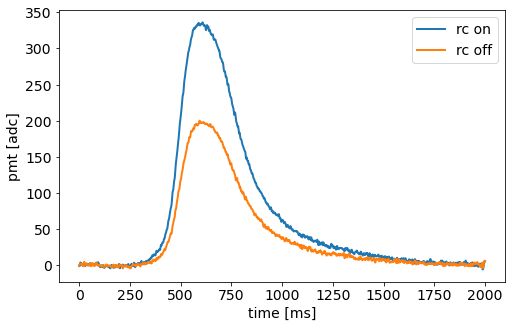

In [13]:
_x = np.linspace(0,1999,2000)/100

fig, ax = plt.subplots(figsize = (8,5))

ax.plot(pmt_open, label = 'rc on', lw = 2)
ax.plot(pmt_closed, label = 'rc off', lw = 2)

ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')
ax.legend(fontsize = 14)
set_fontsize(ax, 14)

print(f'ratio rc on / rc off -> {np.trapz(pmt_open)/np.trapz(pmt_closed):.3f}')